In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_pipeline_classes import preprocessing as ppc, feature_engineering as fe, utils, helper
import statsmodels.formula.api as smf
import statsmodels.api as sm
#import holidays

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
item_categories = pd.read_csv("item_categories.csv")
items = pd.read_csv("items.csv")
sales_train_v2 = pd.read_csv("sales_train_v2.csv")
shops = pd.read_csv("shops.csv")
test = pd.read_csv("test.csv")
holidays = pd.read_csv("RUS_holidays.csv", index_col=0)

In [12]:
#sales_train_v2['datetime'] = pd.to_datetime(sales_train_v2['date'])
#sales_train_v2.to_pickle('train.pkl')

In [13]:
df = pd.read_pickle('train.pkl')

In [14]:
df.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime
0,02.01.2013,0,59,22154,999.00,1.0,2013-02-01
1,03.01.2013,0,25,2552,899.00,1.0,2013-03-01
2,05.01.2013,0,25,2552,899.00,-1.0,2013-05-01
3,06.01.2013,0,25,2554,1709.05,1.0,2013-06-01
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15


In [6]:
df.info()

sales_train_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
datetime          datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 156.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [15]:
holidays['datetime'] = pd.to_datetime(holidays['date'])

In [17]:
df = pd.merge(df,holidays, how='inner', on='datetime' )

In [19]:
df_agg = df.groupby(by='date_block_num')\
    .agg({'item_cnt_day':'count', 'item_price': 'sum'})

In [34]:
df_agg = df.groupby(by='weekday')\
    .agg({'item_cnt_day':'count', 'item_price': 'sum'})

In [35]:
df_agg

,item_cnt_day,item_price
weekday,,
1,368137,3.317335e+08
2,375927,3.435341e+08
3,375151,3.374798e+08
4,372591,3.333153e+08
5,435267,3.911858e+08
6,537372,4.702647e+08
7,471404,4.078973e+08


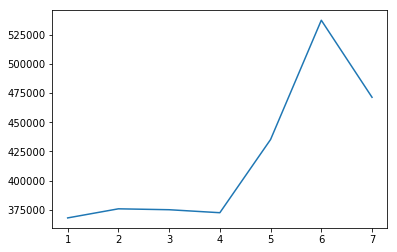

In [36]:
plt.plot(df_agg['item_cnt_day'])

In [26]:
sns.boxplot(data=df_agg, y='item_cnt_day', x='weekday', showfliers=False)

ValueError: Could not interpret input 'weekday'

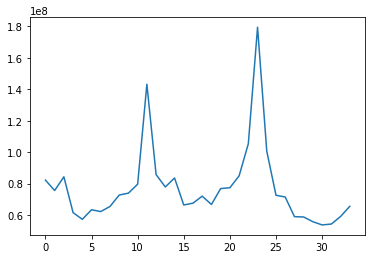

In [20]:
plt.plot(df_agg['item_price'])

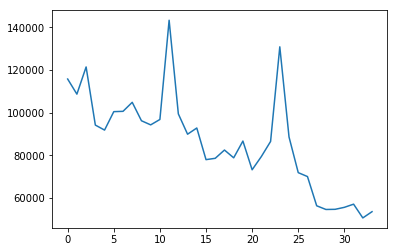

In [9]:
plt.plot(sales_train_v2_agg['item_cnt_day'])

In [28]:
sales_train_v2['day_of_week'] = sales_train_v2['datetime'].apply(lambda x: x.dayofweek)
sales_train_v2['day_of_week'] = sales_train_v2['datetime'].apply(lambda x: x.dayofweek)

In [ ]:
sales_train_

In [7]:
sales_train_v2.

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime
0,02.01.2013,0,59,22154,999.00,1.0,2013-02-01
1,03.01.2013,0,25,2552,899.00,1.0,2013-03-01
2,05.01.2013,0,25,2552,899.00,-1.0,2013-05-01
3,06.01.2013,0,25,2554,1709.05,1.0,2013-06-01
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15
5,10.01.2013,0,25,2564,349.00,1.0,2013-10-01
6,02.01.2013,0,25,2565,549.00,1.0,2013-02-01
7,04.01.2013,0,25,2572,239.00,1.0,2013-04-01
8,11.01.2013,0,25,2572,299.00,1.0,2013-11-01
9,03.01.2013,0,25,2573,299.00,3.0,2013-03-01


In [41]:
holidays.iloc[:,1:]

,date,year,month,day,weekday,weekday_name,weeknumber,is_weekend,is_business_day,is_holiday,holiday_name
0,2013-01-01,2013,1,1,2,Tuesday,1,False,False,True,Новый год Novy god
1,2013-01-02,2013,1,2,3,Wednesday,1,False,False,True,Новый год
2,2013-01-03,2013,1,3,4,Thursday,1,False,False,True,Новый год
3,2013-01-04,2013,1,4,5,Friday,1,False,False,True,Новый год
4,2013-01-05,2013,1,5,6,Saturday,1,True,False,True,Новый год
5,2013-01-06,2013,1,6,7,Sunday,1,True,False,True,Новый год
6,2013-01-07,2013,1,7,1,Monday,2,False,False,True,Рождество Христово Rozhdestvo Khristovo
7,2013-01-08,2013,1,8,2,Tuesday,2,False,False,True,Новый год
8,2013-01-09,2013,1,9,3,Wednesday,2,False,True,False,NaN
9,2013-01-10,2013,1,10,4,Thursday,2,False,True,False,NaN
